# Lista 1
## Metody numeryczne
### Magdalena Ryś 276004

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import time

### Zadanie 1

Rozważmy dwa przybliżenia Pad´ego funkcji exp(−x):

$$ z_1 = \dfrac{6-2x}{6+4x+x^2} $$

$$ z_2 = \dfrac{6-4x+x^2}{6+2x} $$

Korzystając z dowolnej biblioteki do rysowania wykresów w Pythonie,
sporządź wykres:
- przybliżeń Pad´ego (na jednym rysunku),
- tych samych przybliżeń, ale na oddzielnych rysunkach w trybie wielowykresowym,
- błędu każdego przybliżenia.

Do wykresów dodaj tytuł, opisy osi i własną legendę. Poeksperymentuj ze
stylami, grubością i kolorami linii. Następnie zapisz te wykresy do formatu
png i/lub pdf.

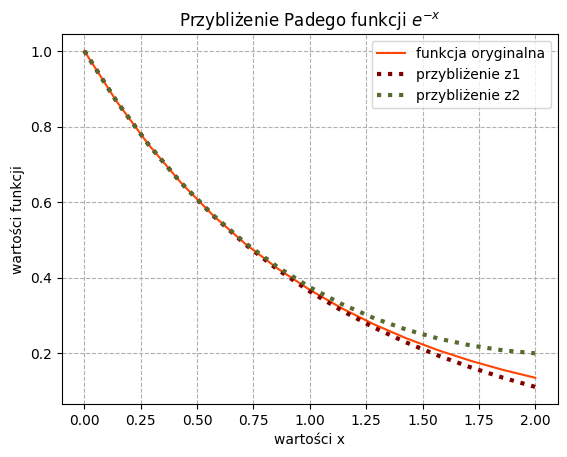

In [19]:
xs = np.linspace(0, 2, 10^5)

def f(x):
    """Function:
        funkcja oryginalna
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość funkcji w punkcie x"""
    return np.exp(-x)

def z1(x):
    """Function:
        przybliżenie Padego z1
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość funkcji w punkcie x"""
    return (6-2*x)/(6+4*x+x**2)

def z2(x):
    """Function:
        przybliżenie Padego z2
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość funkcji w punkcie x"""
    return (6-4*x+x**2)/(6+2*x)

plt.plot(xs, f(xs), label="funkcja oryginalna", color="#FF4500")
plt.plot(xs, z1(xs), label="przybliżenie z1", color="#800000", linestyle="dotted", linewidth=3.0)
plt.plot(xs, z2(xs), label="przybliżenie z2", color="#556B2F", linestyle="dotted", linewidth=3.0)
plt.title("Przybliżenie Padego funkcji $e^{-x}$")
plt.xlabel("wartości x")
plt.ylabel("wartości funkcji")
plt.legend()
plt.grid(True, linestyle="--")
plt.savefig("wykres.png")
plt.show()

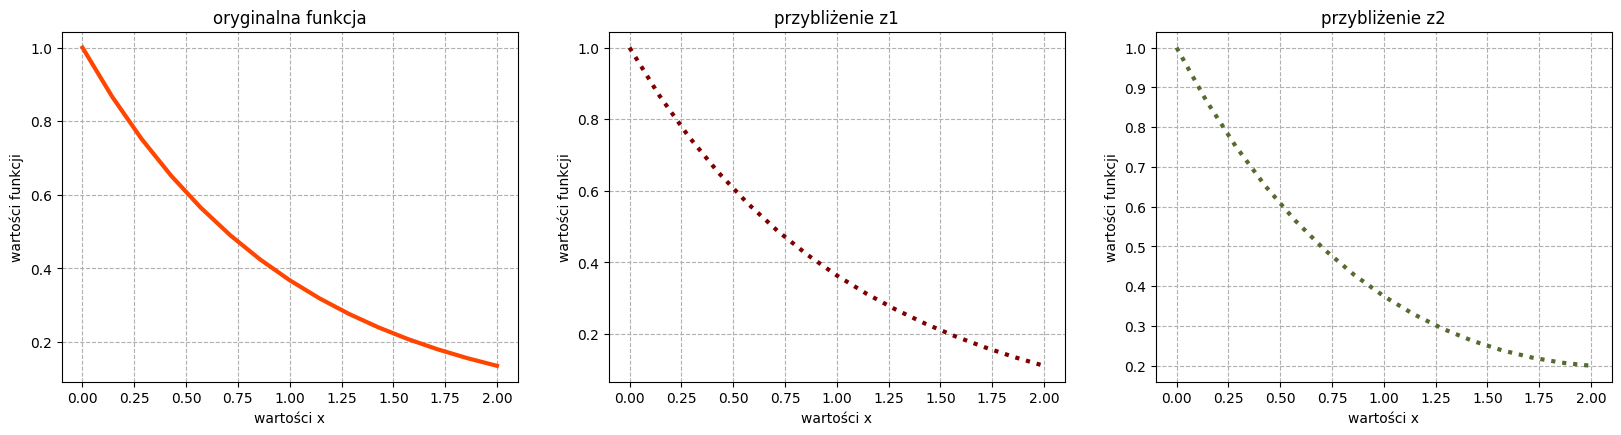

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title("oryginalna funkcja")
plt.grid(True, linestyle="--")
plt.xlabel("wartości x")
plt.ylabel("wartości funkcji")
plt.plot(xs, f(xs), color="#FF4500", linewidth=3.0)

plt.subplot(2, 3, 2)
plt.title("przybliżenie z1")
plt.grid(True, linestyle="--")
plt.xlabel("wartości x")
plt.ylabel("wartości funkcji")
plt.plot(xs, z1(xs), color="#800000", linestyle="dotted", linewidth=3.0)

plt.subplot(2, 3, 3)
plt.title("przybliżenie z2")
plt.grid(True, linestyle="--")
plt.xlabel("wartości x")
plt.ylabel("wartości funkcji")
plt.plot(xs, z2(xs), color="#556B2F", linestyle="dotted", linewidth=3.0)

plt.show()

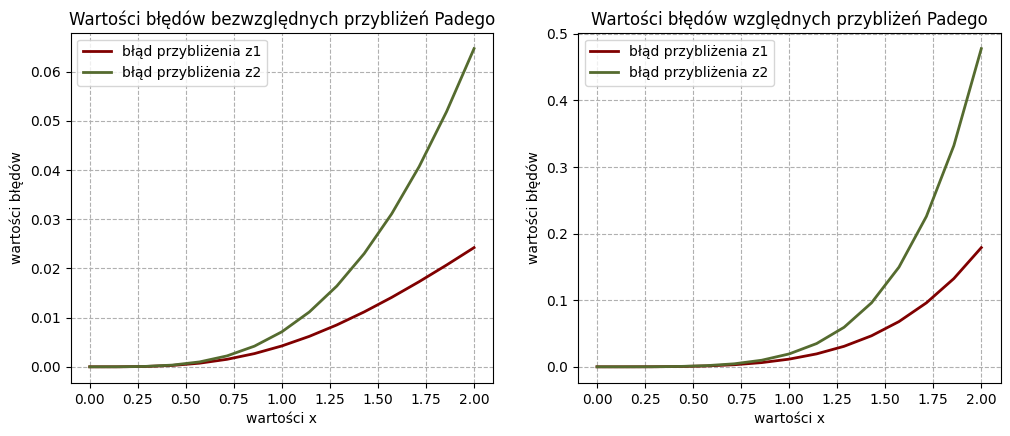

In [21]:
def error_z1(x):
    """Function:
        błąd bezwzględny przybliżenia Padego z1
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość błędu w punkcie x"""
    return np.abs(f(x) - z1(x))

def error_z2(x):
    """Function:
        błąd bezwzględny przybliżenia Padego z2
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość błędu w punkcie x"""
    return np.abs(f(x) - z2(x))

def error_z1_wzgledny(x):
    """Function:
        błąd względny przybliżenia Padego z1
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość błędu w punkcie x"""
    return np.abs(f(x) - z1(x)) / f(x)

def error_z2_wzgledny(x):
    """Function:
        błąd względny przybliżenia Padego z2
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość błędu w punkcie x"""
    return np.abs(f(x) - z2(x)) / f(x)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)

plt.plot(xs, error_z1(xs), label="błąd przybliżenia z1", color="#800000", linewidth=2.0)
plt.plot(xs, error_z2(xs), label="błąd przybliżenia z2", color="#556B2F", linewidth=2.0)
plt.grid(True, linestyle="--")
plt.title("Wartości błędów bezwzględnych przybliżeń Padego")
plt.xlabel("wartości x")
plt.ylabel("wartości błędów")
plt.legend()

plt.subplot(2, 2, 2)

plt.plot(xs, error_z1_wzgledny(xs), label="błąd przybliżenia z1", color="#800000", linewidth=2.0)
plt.plot(xs, error_z2_wzgledny(xs), label="błąd przybliżenia z2", color="#556B2F", linewidth=2.0)
plt.grid(True, linestyle="--")
plt.title("Wartości błędów względnych przybliżeń Padego")
plt.xlabel("wartości x")
plt.ylabel("wartości błędów")
plt.legend()
plt.show()

### Zadanie 2
Napisz program znajdujący dokładność maszynową na Twoim komputerze.

In [22]:
eps = 0.1

while 1 + eps != 1:
    eps /= 2

print(eps)

8.881784197001253e-17


### Zadanie 3
Jaki jest wynik działania
$ 7/100 ∗ 100 − 7 $
wykonanego w Pythonie? Wyjaśnij przyczynę błędu. Sprawdź, które z
liczb od 1 do 50 są również podatne na błąd tego typu.

In [23]:
print(7/100 * 100 - 7)

8.881784197001252e-16


Wynik jest niezerowy z powodu ograniczonej precyzji liczb zmiennoprzecinkowych, co wiąże się z drobnymi błędami zaokrągleń, szczególnie dla liczb o nieskończonych rozwinięciach dziesiętnych. W tym przypadku takim rozwinięciem jest liczba $ 7/100 $. Poniżej wyznaczono inne liczby podatne na błędy tego typu:

In [24]:
result = []

for i in range(50):
    if i/100 * 100 - i != 0:
        result.append(i)

print(result)

[7, 14, 28, 29]


### Zadanie 4
Liczba 1,7 ma w standardzie IEEE przybliżoną reprezentację. Jaki jest błąd bezwzględny i względny tego przybliżenia?

Aby obliczyć błąd względny i bezwzględny przybliżenia musimy rozpocząć od odczytania przybliżenia. Mamy podane:

**Znak**: 0 - czyli liczba jest dodatnia

**Wykładnik**: 01111111 - należy zamienić zapis binarny na dziesiętny:

$$ (01111111)_{2} = 0 \cdot 2^7 + 1 \cdot 2^6 + 1 \cdot 2^5 + 1 \cdot 2^4 + 1 \cdot 2^3 + 1 \cdot 2^2 + 1 \cdot 2^1 + 1 \cdot 2^0 = (127)_{10} $$

Aby otrzymać prawdziwą wartość wykładnika musimy od otrzymanego wyniku odjąć $127$ (BIAS), a więc otrzymujemy wynik $0$.

**Część ułamkowa**: 10110011001100110011001 - analogicznie odczytujemy część ułamkową:

$$ (0.10110011001100110011001)_{2} = (0.6999999284744263)_{10} $$

Dodajemy więc jeszcze jedynkę wynikającą z normalizacji i otrzymujemy $ 1.6999999284744263 $.

In [25]:
2**6 + 2**5 + 2**4 + 2**3 + 2**2 + 2**1 + 2**0

127

In [26]:
2**(-1) + 2**(-3) + 2**(-4) + 2**(-7) + 2**(-8) + 2**(-11) + 2**(-12) + 2**(-15) + 2**(-16) + 2**(-19) + 2**(-20) + 2**(-23)

0.6999999284744263

In [27]:
print("błąd bezwzględny:", np.abs(1.7 - 1.6999999284744263))

błąd bezwzględny: 7.152557368605983e-08


In [28]:
print("błąd względny:", np.abs(1.7 - 1.6999999284744263) / 1.7)

błąd względny: 4.2073866874152845e-08


### Zadanie 5

Napisz funkcję obliczającą wartość wielomianu
$$ W(x) = 6x^4 + 5x^3 − 13x^2 + x + 1 $$
dla zadanego x. Korzystając z niej, oblicz wartość wielomianu dla wszystkich x z przedziału $⟨−10, 10⟩$ przy kroku $dx = 0.0001$. Wykonaj profil
tego programu.

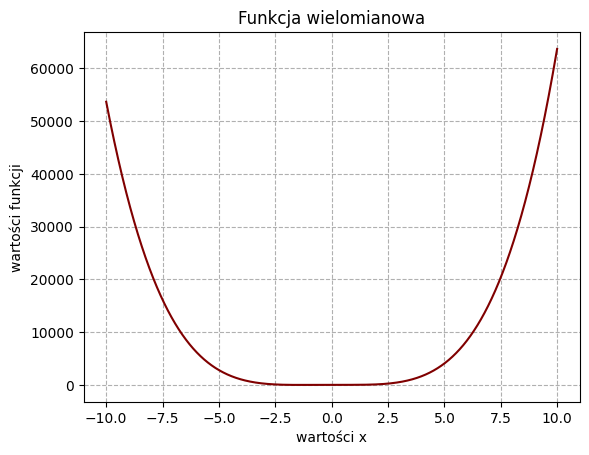

In [34]:
dx = np.linspace(-10, 10, 2*10**5)

def w(x):
    """Function:
        funkcja wielomianowa
    
    Input:
        x (float): argument x
    
    Output:
        (float): wartość funkcji w punkcie x"""
    return 6 * x**4 + 5 * x**3 - 13 * x**2 + x + 1

plt.plot(dx, w(dx), color="#800000")
plt.title("Funkcja wielomianowa")
plt.xlabel("wartości x")
plt.ylabel("wartości funkcji")
plt.grid(True, linestyle="--")
plt.show()

In [33]:
def w_time():
    """Function:
        funkcja mierząca czas działania funkcji w(x)
    
    Output:
        (float): czas działania funkcji"""
    start = time.perf_counter()
    w(dx)
    return time.perf_counter() - start

print("czas działania programu:", w_time())

czas działania programu: 0.0542903000023216


### Zadanie 6
Za najbardziej ekonomiczny sposób wyliczania wartości wielomianu uznawany jest schemat Hornera. Korzystając z tego schematu, zmodyfikuj program z poprzedniego zadania. Ponownie wykonaj profil programu. Porównaj go z wcześniejszym profilem.

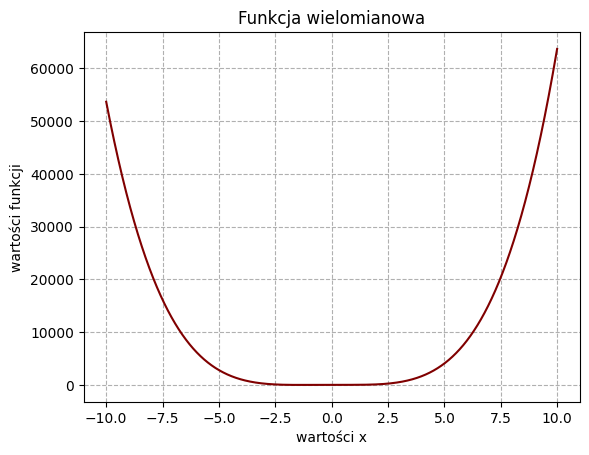

In [35]:
wsp = [6, 5, -13, 1, 1]

def horner(wsp, x):

    """Function:
        funkcja wielomianowa
    
    Input:
        wsp (list): współczynniki wielomianu w kolejności od najwyższego stopnia do najniższego (Uwaga! jeśli danego stopnia nie ma należy wpisać 0)
        x (float): argument x
    
    Output:
        (float): wartość funkcji w punkcie x"""

    result = 0

    for w in wsp:
        result = result * x + w

    return result

plt.plot(dx, horner(wsp, dx), color="#800000")
plt.grid(True, linestyle="--")
plt.title("Funkcja wielomianowa")
plt.xlabel("wartości x")
plt.ylabel("wartości funkcji")
plt.show()

In [32]:
def horner_time():
    """Function:
        funkcja mierząca czas działania funkcji horner(wsp, x)
    
    Output:
        (float): czas działania funkcji"""
    start = time.perf_counter()
    horner(wsp, dx)
    return time.perf_counter() - start

print("czas dla funkcji horner:", horner_time())
print("czas dla funkcji w:", w_time())

czas dla funkcji horner: 0.013011599890887737
czas dla funkcji w: 0.043151300051249564


Jak widać, zmierzone czasy potwierdzają, że metoda hornera jest szybszą metodą obliczania wartości wielomianu